In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import display
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Data Repository
from ucimlrepo import fetch_ucirepo 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

# Geommetric Analysis of Tumorous Cells in Breast Tissue

## Explanation
- Cell 2: Data Exploration and Comparison of Relevant Geommetric Features
- Cell 3: Entropy and Information Gain
- Cell 4: Decision Tree

## Summary:
While it is very close to determine whether a tumor cell is benign or malignant without taking any of its features into consideration due to high data entropy (0.9526), the high information gain from analyzing existing geommetric features does help us make a more educated and likely guess on whether a cell is benign or tumorous.

As per the Code Block 2, the information gain for radius lies around 0.5183 and for concavity lies around 0.5018, which are the two geommetric values that are the closest to 1.
As per the analysis, the radius and concavity of a tumor cells do vary between benign and malign cells, which increases the confidence of the computer in its decision making process.

However, due to high data entropy and still-existent uncertainty, geommetric features cannot be the single factor to be taken into consideration for differentiating between benign and malign tumor cells.

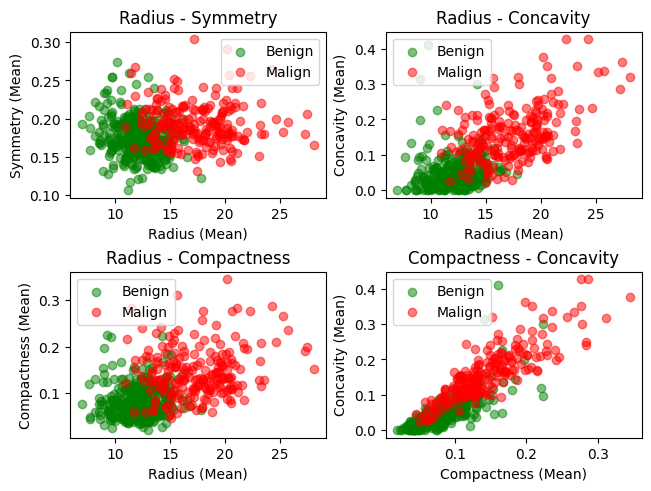

In [5]:
## Block 1: Comparison of geometric features of tumor cells

# Variables
mask = y['Diagnosis'] == 'M'
features = ['radius1', 'compactness1', 'concavity1', 'symmetry1', 'smoothness1']
pairs = [
    ('radius1', 'symmetry1', 'Radius', 'Symmetry'),
    ('radius1', 'concavity1', 'Radius', 'Concavity'),
    ('radius1', 'compactness1', 'Radius', 'Compactness'),
    ('compactness1', 'concavity1', 'Compactness', 'Concavity')
]

fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, layout="constrained")

for idx, (feat_x, feat_y, label_x, label_y) in enumerate(pairs):
    row, col = divmod(idx, 2)
    axs[row, col].scatter(X[feat_x][~mask], X[feat_y][~mask], color='green', label='Benign', alpha=0.5)
    axs[row, col].scatter(X[feat_x][mask], X[feat_y][mask], color='red', label='Malign', alpha=0.5)
    axs[row, col].set_xlabel(f'{label_x} (Mean)')
    axs[row, col].set_ylabel(f'{label_y} (Mean)')
    axs[row, col].set_title(f'{label_x} - {label_y}')
    axs[row, col].legend()

plt.show()

In [ ]:
## Block 2: Entropy and information gain calculation for comparison of geometric features of tumor cells

def entropy(data, column):
    """
    Entropy = -sum(p_i * log2(p_i))
    """
    value_counts = data[column].value_counts()
    total = len(data)

    ent = 0
    for count in value_counts:
        if count > 0:
            probability = count / total
            ent -= probability * math.log2(probability)
    return ent

def information_gain(X, y, feature, target='Diagnosis', bins=10):
    """
    Information Gain = H(target) - H(target || feature)
    """

    h_target = entropy(y, target)

    combined = pd.DataFrame({
        'feature_binned': pd.cut(X[feature], bins=bins),
        target: y[target]
    })

    h_conditional = 0
    total = len(combined)
    for bin_value, group in combined.groupby('feature_binned', observed=True):
        weight = len(group) / total
        h_conditional += weight * entropy(group, target)

    return h_target - h_conditional

print(f'Baseline Entropy of Diagnosis: {entropy(y, "Diagnosis"):.4f}\n')

for feature in features:
    ig = information_gain(X, y, feature)
    print(f'Information Gain for {feature}: {ig:.4f}')

Baseline Entropy of Diagnosis: 0.9526

Information Gain for radius1: 0.5183
Information Gain for compactness1: 0.3149
Information Gain for concavity1: 0.5018
Information Gain for symmetry1: 0.0929
Information Gain for smoothness1: 0.1137


Accuracy: 0.9006

              precision    recall  f1-score   support

      Benign       0.93      0.91      0.92       108
      Malign       0.85      0.89      0.87        63

    accuracy                           0.90       171
   macro avg       0.89      0.90      0.89       171
weighted avg       0.90      0.90      0.90       171



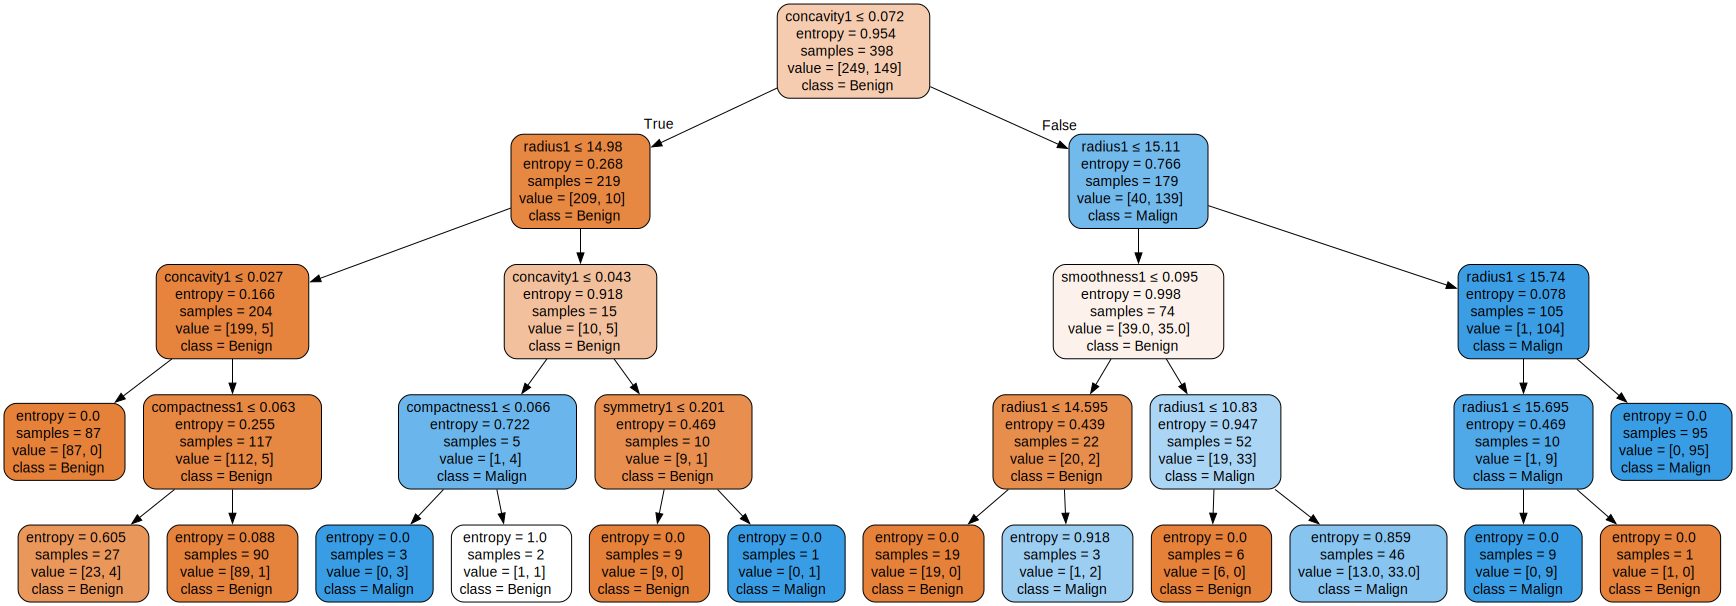

In [4]:
# Block 3: Decision Tree Classifier for geometry

feature_columns = ['radius1', 'compactness1', 'concavity1', 'symmetry1', 'smoothness1']
X_selected = X[feature_columns]

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y['Diagnosis'], test_size=0.3, random_state=42
)

clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=4)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}\n')
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malign']))

dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_columns,
    class_names=['Benign', 'Malign'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
display(graph)